***Introduction***
In this Notebook,I have tried Exploratory Data Analysis on Confused_EEG dataset
Steps followed:
1. Loading the Libraries and Dataset
2. Eploring the Dataset 
3. Analysing the Dataset 
4. Univariate Data Analysis
5. Multivariate Data Analysis
6. Predicting the Targets
7. Evaluation of neural network

In [1]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from sklearn.metrics import confusion_matrix,classification_report

2023-11-12 00:13:51.057171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Exploring the Dataset**

In [2]:
sns.set(style='darkgrid',color_codes=True)

In [3]:
eeg_data = pd.read_csv('./EEG_data.csv')
info_data=pd.read_csv('./demographic_info.csv')
eeg_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
info_data

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [5]:
info_data.rename(columns={'subject ID':'SubjectID'},inplace=True)

In [6]:
info_data=info_data.merge(eeg_data,on='SubjectID')

In [7]:
info_data.head()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [8]:
info_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [9]:
data=info_data.drop(['SubjectID','VideoID','predefinedlabel'],axis=1)

In [10]:
data.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [11]:
data=data.rename(columns={' age':'Age',' ethnicity':'Ethnicity',' gender':'Gender','user-definedlabeln':'Label'})

In [12]:
data['Label']=data['Label'].astype(np.int)

/tmp/ipykernel_24412/716256608.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Label']=data['Label'].astype(np.int)


In [13]:
data

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,25,Han Chinese,M,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,25,Han Chinese,M,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,25,Han Chinese,M,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,25,Han Chinese,M,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,F,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0
12807,24,Han Chinese,F,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0
12808,24,Han Chinese,F,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0
12809,24,Han Chinese,F,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0


In [14]:
print('Missing Values:',data.isna().sum().sum())

Missing Values: 0


In [15]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
data["Gender"]=data["Gender"].apply(lambda x:1 if x=='M' else 0)

In [17]:
data['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [18]:
Ethnicity_dummies = pd.get_dummies(data['Ethnicity'])
data=pd.concat([data,Ethnicity_dummies],axis=1)
data=data.drop('Ethnicity',axis=1)

In [19]:
data

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0,0,0,1
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0,0,0,1
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0,0,0,1
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0,0,0,1


In [20]:
print('Object dtype columns in dataframe:',data.select_dtypes('object').columns)

Object dtype columns in dataframe: Index([], dtype='object')


In [21]:
Features=data.drop('Label',axis=1).copy()
num_features=len(Features.columns)
print('Features:',num_features)

Features: 16


In [22]:
Categorical_features=['Age','Gender','Bengali','English','Han Chinese']
Continous_features=['Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']
print('Categorical_features:',len(Categorical_features))
print('Continous_features:',len(Continous_features))

Categorical_features: 5
Continous_features: 11


**Unvariate Analysis**

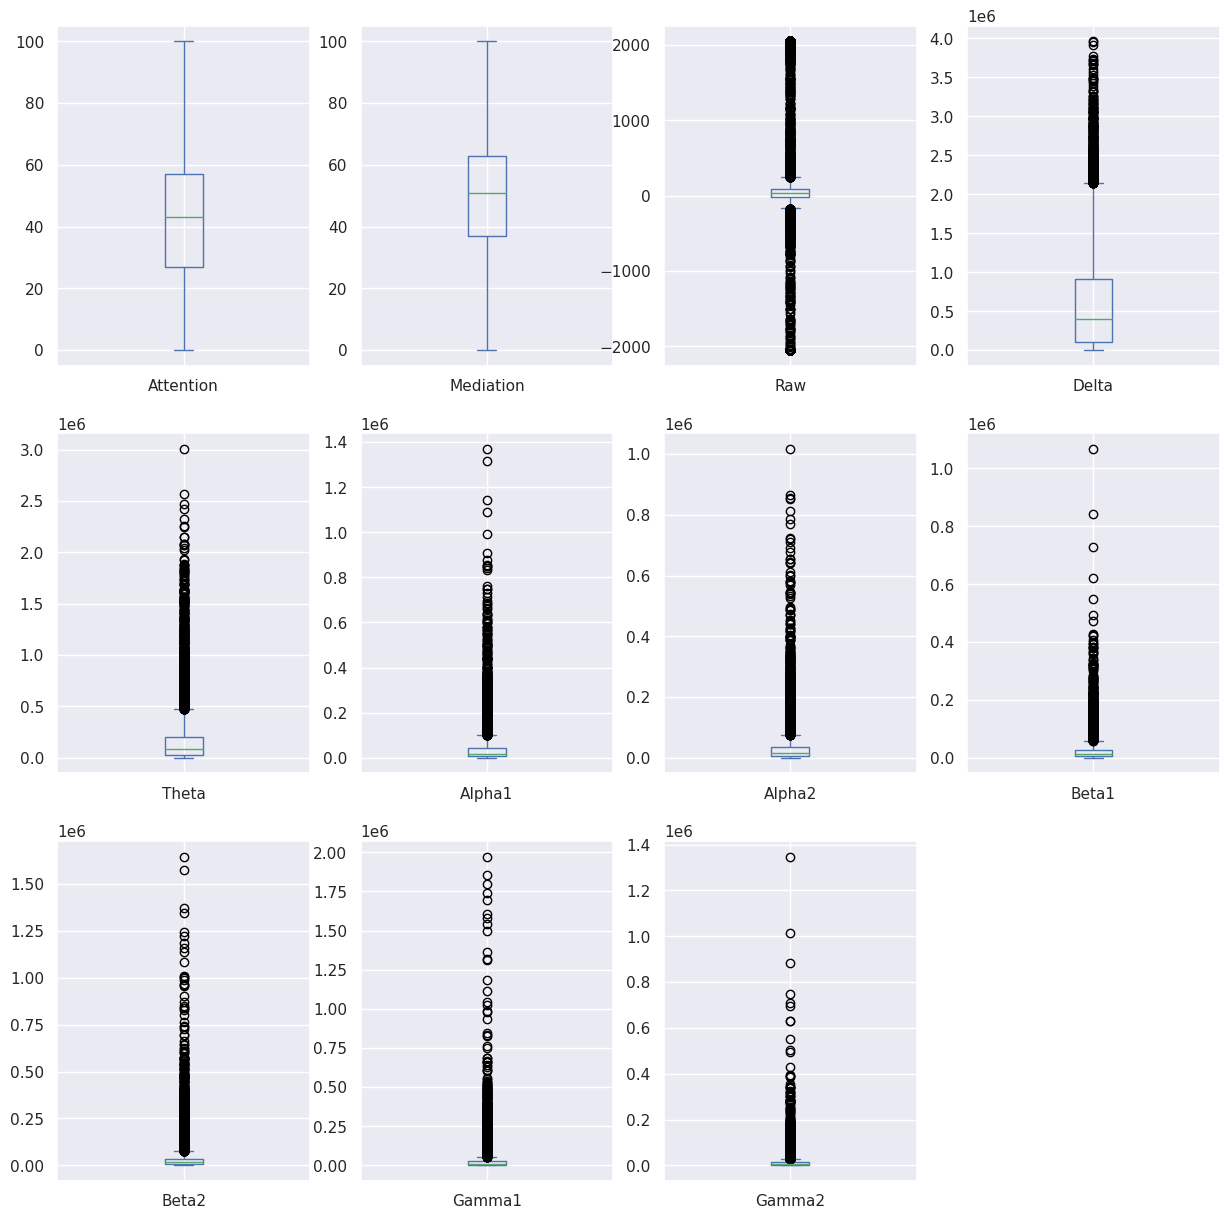

In [23]:
Features[Continous_features].plot(kind='box',figsize=(15,15),subplots=True,layout=(3,4))
plt.show()

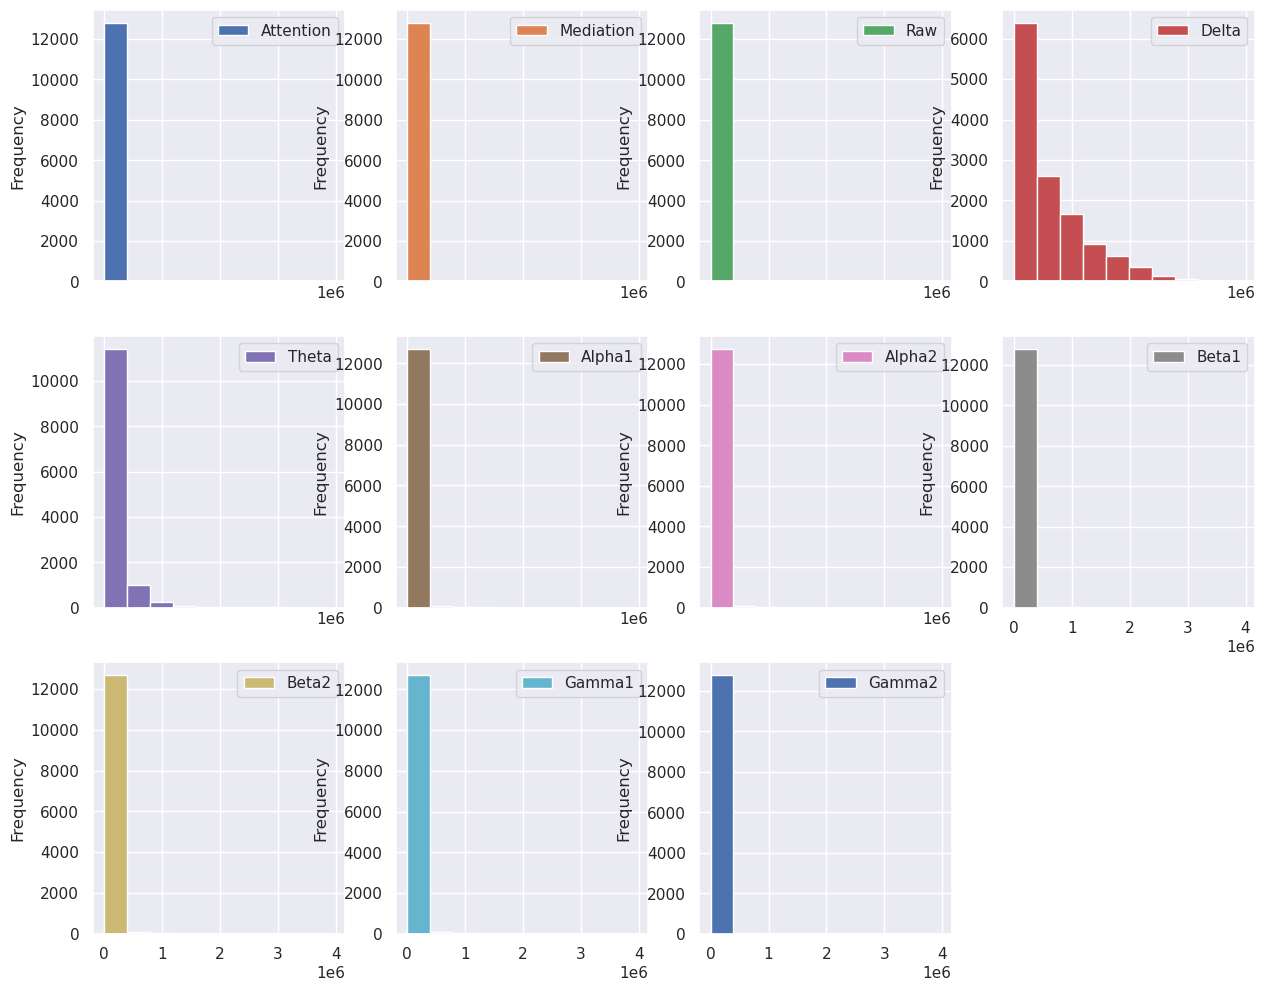

In [24]:
Features[Continous_features].plot(kind='hist',figsize=(15,12),subplots=True,layout=(3,4))
plt.show()

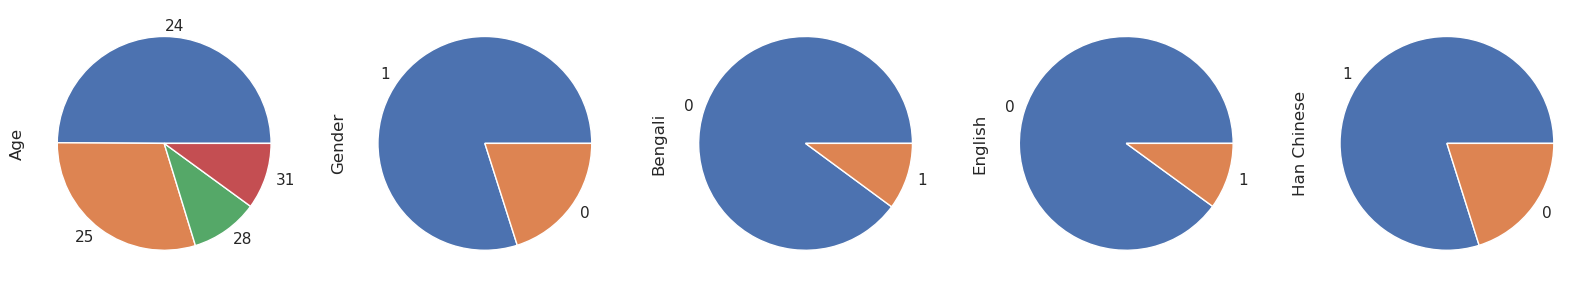

In [25]:
plt.figure(figsize=(20,5))

for feature in Categorical_features:
    plt.subplot(1,5,Categorical_features.index(feature)+1)
    Features[feature].value_counts().plot(kind='pie')
plt.show()

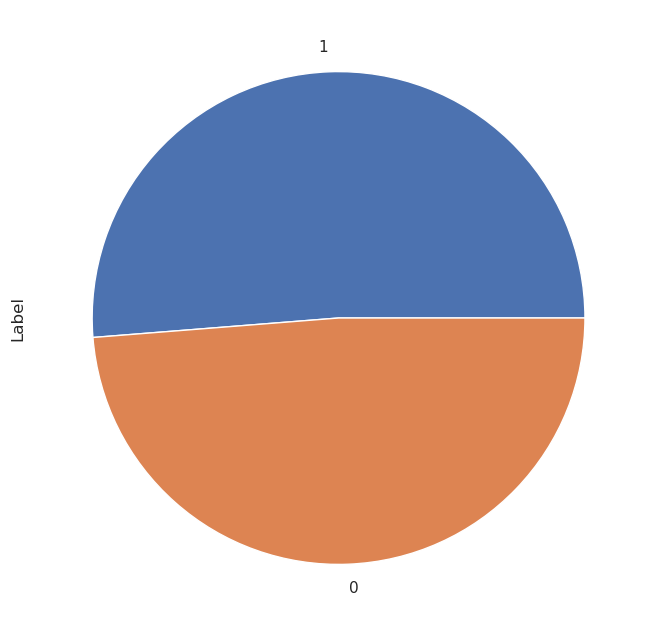

In [26]:
plt.figure(figsize=(8,8))
data['Label'].value_counts().plot(kind='pie')
plt.show()

**MultiVariate Analysis**

<Figure size 2000x2000 with 0 Axes>

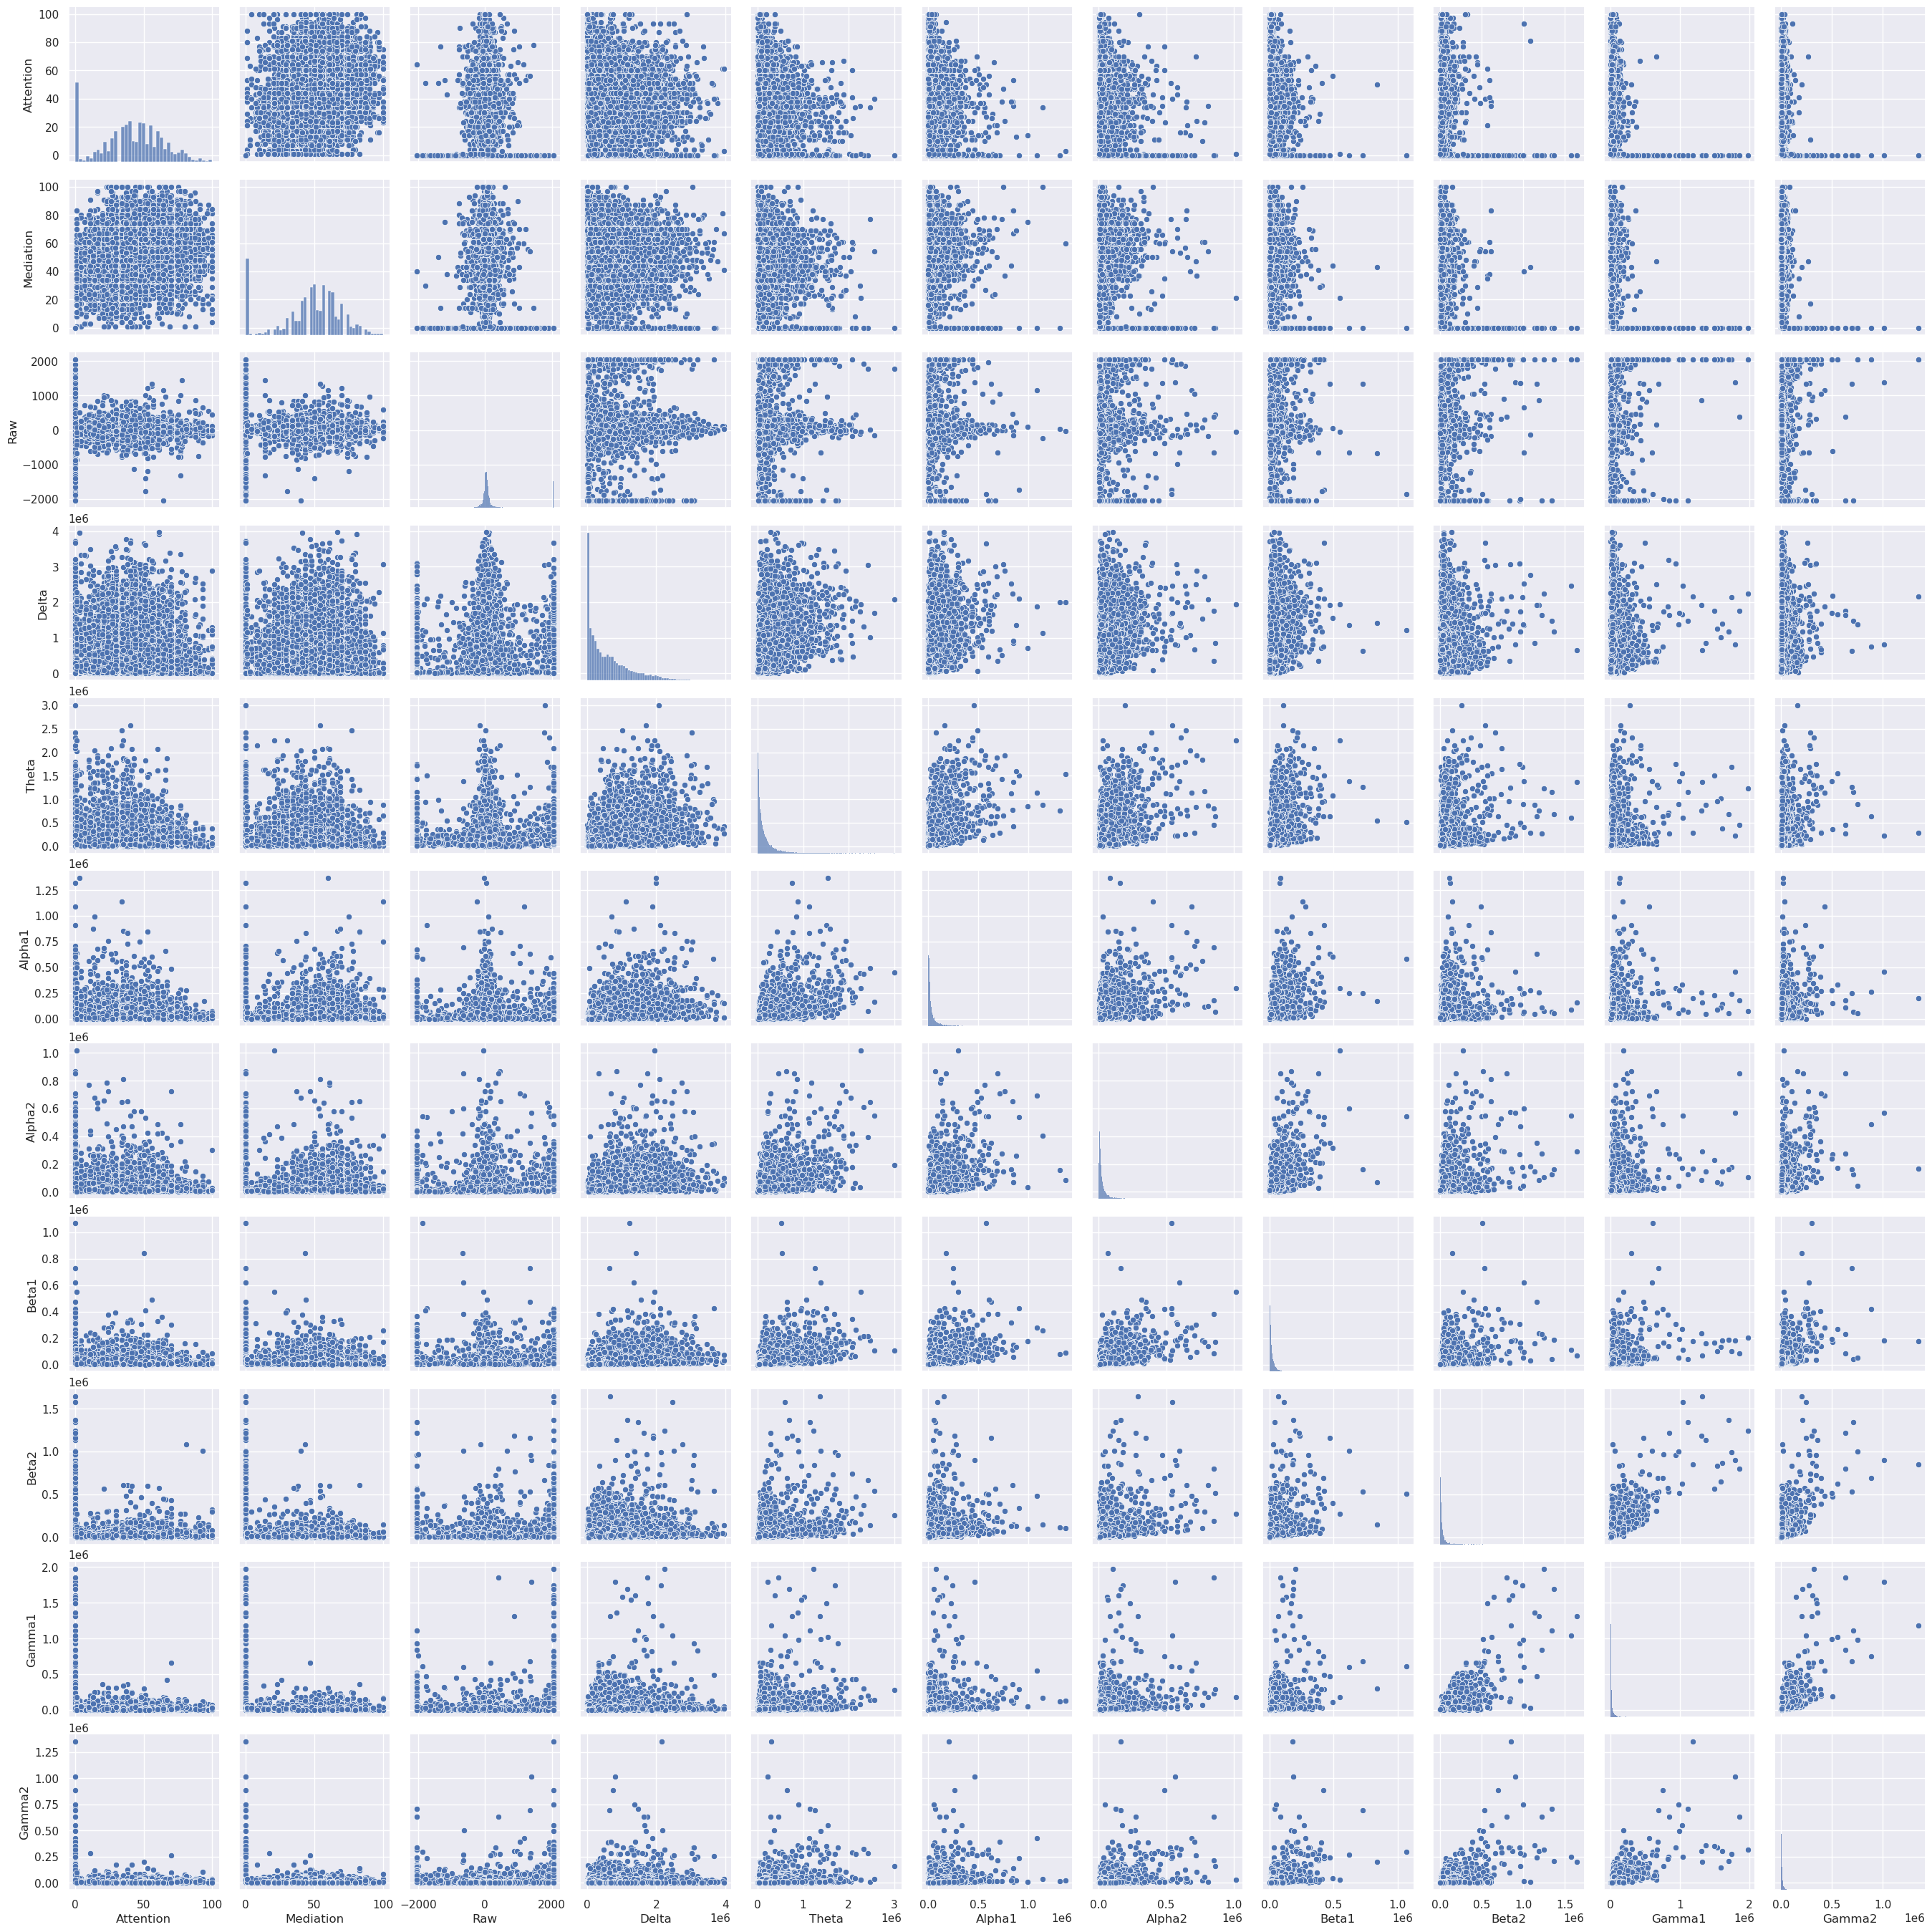

In [27]:
plt.figure(figsize=(20,20))
sns.pairplot(Features[Continous_features])
plt.show()

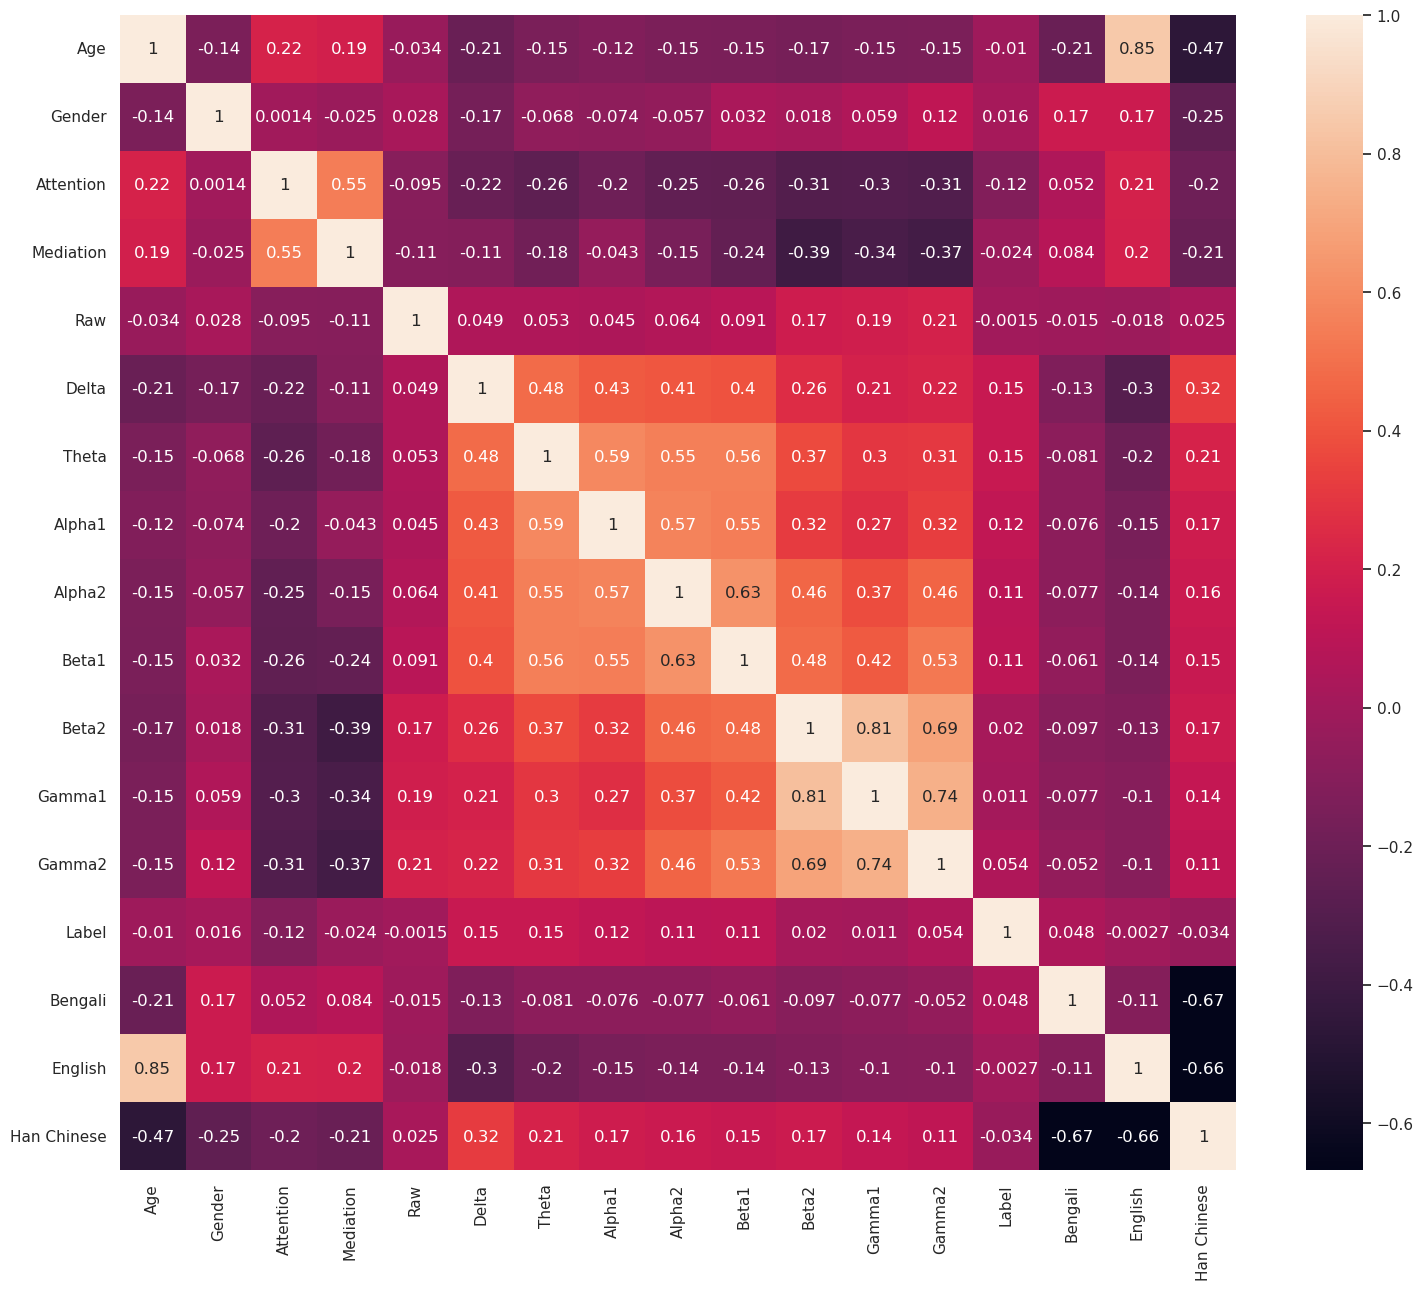

In [28]:
corr = data.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()

In [29]:
y=data['Label'].copy()
x=data.drop('Label',axis=1).copy()

In [32]:
x.head()

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,1


In [33]:
scaler = StandardScaler()
X=scaler.fit_transform(x)

In [34]:
X

array([[-0.18591779,  0.50156067,  0.63433386, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.18591779,  0.50156067, -0.05674966, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.18591779,  0.50156067,  0.24559938, ..., -0.33533899,
        -0.33375238,  0.50204819],
       ...,
       [-0.63941983, -1.99377673,  0.80710475, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.63941983, -1.99377673,  0.80710475, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.63941983, -1.99377673,  0.97987563, ..., -0.33533899,
        -0.33375238,  0.50204819]])

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.7,random_state=123)

In [36]:
X_train

array([[-0.63941983,  0.50156067, -1.78445846, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.18591779,  0.50156067, -0.1431351 , ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.63941983,  0.50156067,  0.41837026, ..., -0.33533899,
        -0.33375238,  0.50204819],
       ...,
       [-0.63941983,  0.50156067,  2.10288635, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [-0.63941983, -1.99377673, -0.61825502, ..., -0.33533899,
        -0.33375238,  0.50204819],
       [ 2.53509449,  0.50156067,  0.97987563, ..., -0.33533899,
         2.99623336, -1.99184067]])

**Training the data**

In [37]:
inputs = tf.keras.Input(shape=(X_train.shape[1]))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]
             )
batch_size=32
epochs=50
history=model.fit(
            X_train,
            Y_train,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

2023-11-12 00:18:30.634228: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/50
225/225 [==============================] - 3s 9ms/step - loss: 0.6583 - accuracy: 0.6109 - auc: 0.6521 - val_loss: 0.6438 - val_accuracy: 0.6349 - val_auc: 0.6787 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 3s 13ms/step - loss: 0.6332 - accuracy: 0.6360 - auc: 0.6945 - val_loss: 0.6394 - val_accuracy: 0.6366 - val_auc: 0.6951 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 3s 12ms/step - loss: 0.6241 - accuracy: 0.6537 - auc: 0.7063 - val_loss: 0.6218 - val_accuracy: 0.6449 - val_auc: 0.7089 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 2s 7ms/step - loss: 0.6137 - accuracy: 0.6569 - auc: 0.7188 - val_loss: 0.6298 - val_accuracy: 0.6511 - val_auc: 0.6987 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 2s 10ms/step - loss: 0.6093 - accuracy: 0.6649 - auc: 0.7246 - val_loss: 0.6195 - val_accuracy: 0.6566 - val_auc: 0.7136 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 2s 8ms/s

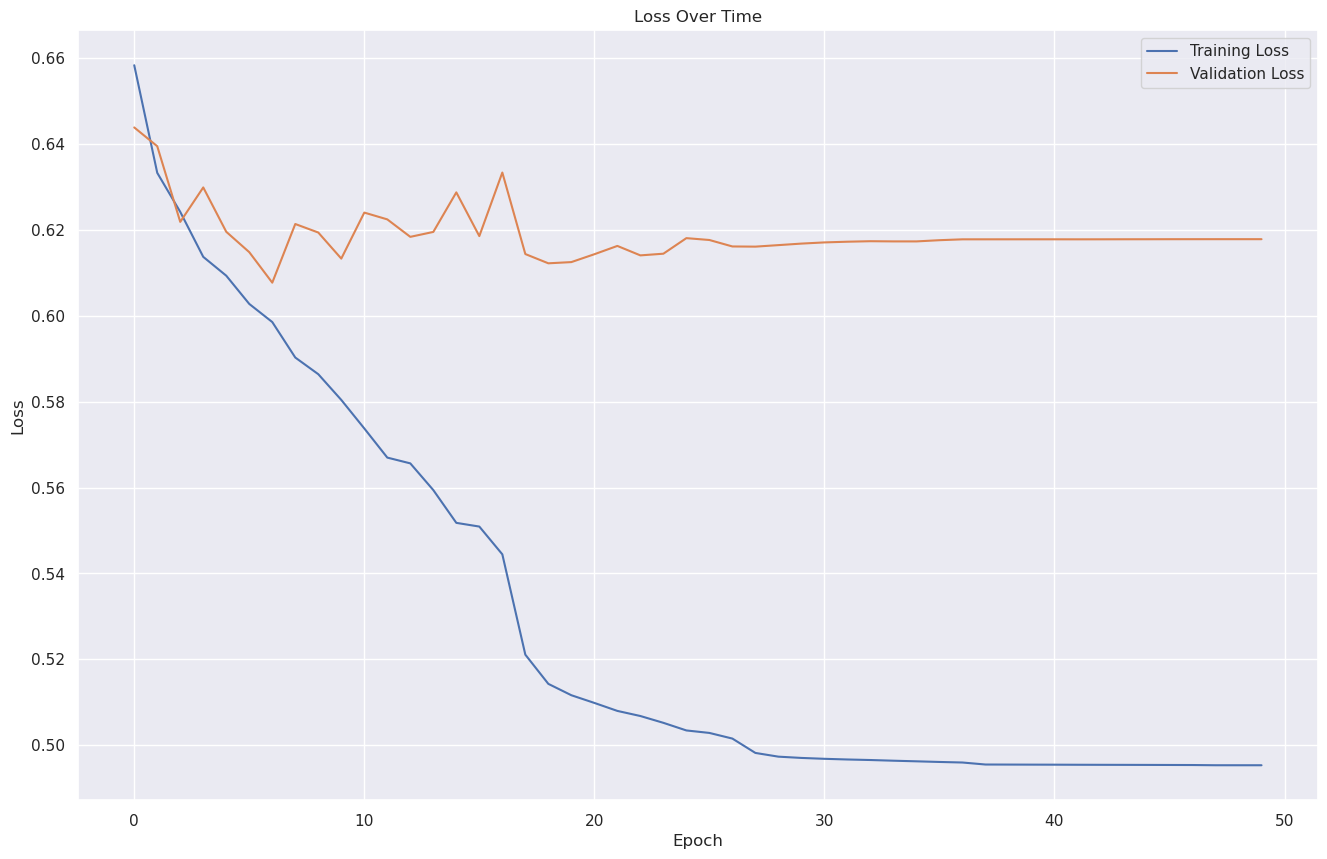

In [38]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [39]:
model.evaluate(X_test, Y_test)
y_true = np.array(Y_test)

y_pred = np.squeeze(model.predict(X_test))
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

121/121 [==============================] - 1s 6ms/step


/tmp/ipykernel_24412/1054378001.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(y_pred >= 0.5, dtype=np.int)


In [40]:
y_true = np.array(Y_test)

y_pred = np.squeeze(model.predict(X_test))
y_pred = np.array(y_pred >=0.5, dtype=np.int)
y_pred

121/121 [==============================] - 1s 4ms/step


/tmp/ipykernel_24412/1198477879.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(y_pred >=0.5, dtype=np.int)


array([1, 0, 0, ..., 0, 0, 1])

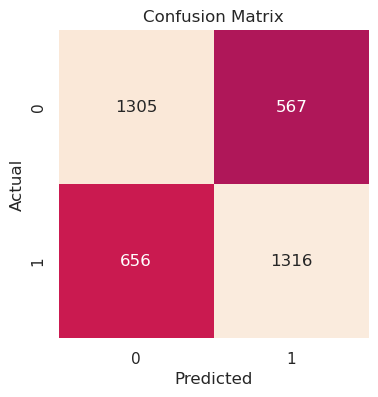

In [41]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [42]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1872
           1       0.70      0.67      0.68      1972

    accuracy                           0.68      3844
   macro avg       0.68      0.68      0.68      3844
weighted avg       0.68      0.68      0.68      3844

